In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## 1 导入训练数据

In [4]:
x_data = torch.tensor([[1.0] , [2.0] , [3.0]])
y_data = torch.tensor([[3.0] , [5.0] , [7.0]])

## 2 设计训练模型

In [9]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel , self).__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred
Model = LinearModel()

## 3 给定损失函数以及优化模型

In [10]:
criterion = torch.nn.MSELoss(size_average=False) # sum
optimizer = torch.optim.SGD(Model.parameters(),lr =0.05)

## 4 进行训练

In [11]:
loss_list = []
epoch_list = []
w_list = []
b_list = []

for epoch in range(0 , 51 , 1):
    epoch_list.append(epoch)
    y_pred = Model(x_data)
    loss = criterion(y_pred , y_data)
    loss_list.append(loss.item()) # 转换成标量
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    w_list.append(Model.linear.weight.item())
    b_list.append(Model.linear.bias.item())

## 5 打印日志

In [12]:
for e,l,w ,b in zip(epoch_list , loss_list , w_list , b_list):
    print(f'第{e}轮的时候，损失为{l:.6f}，权重为{w:.6f} , 偏置为{b:.6f} \n')

第0轮的时候，损失为59.623936，权重为3.122254 , 偏置为1.570055 

第1轮的时候，损失为26.284218，权重为1.209065 , 偏置为0.725686 

第2轮的时候，损失为11.587410，权重为2.480962 , 偏置为1.282541 

第3轮的时候，损失为5.108731，权重为1.638091 , 偏置为0.909201 

第4轮的时候，损失为2.252762，权重为2.199243 , 偏置为1.153587 

第5轮的时候，损失为0.993748，权重为1.828151 , 偏置为0.987965 

第6轮的时候，损失为0.438703，权重为2.075961 , 偏置为1.094685 

第7轮的时候，损失为0.193983，权重为1.912805 , 偏置为1.020703 

第8轮的时候，损失为0.086065，权重为2.022456 , 偏置为1.066809 

第9轮的时候，损失为0.038454，权重为1.950932 , 偏置为1.033293 

第10轮的时候，损失为0.017429，权重为1.999652 , 偏置为1.052746 

第11轮的时候，损失为0.008127，权重为1.968492 , 偏置为1.037131 

第12轮的时候，损失为0.003996，权重为1.990325 , 偏置为1.044896 

第13轮的时候，损失为0.002145，权重为1.976932 , 偏置为1.037233 

第14轮的时候，损失为0.001302，权重为1.986887 , 偏置为1.039904 

第15轮的时候，损失为0.000905，权重为1.981303 , 偏置为1.035800 

第16轮的时候，损失为0.000707，权重为1.985999 , 偏置为1.036278 

第17轮的时候，损失为0.000598，权重为1.983834 , 偏置为1.033795 

第18轮的时候，损失为0.000529，权重为1.986189 , 偏置为1.033357 

第19轮的时候，损失为0.000480，权重为1.985510 , 偏置为1.031636 

第20轮的时候，损失为0.000441，权重为1.986814 , 偏置为1.030839 


## 6 绘制图像

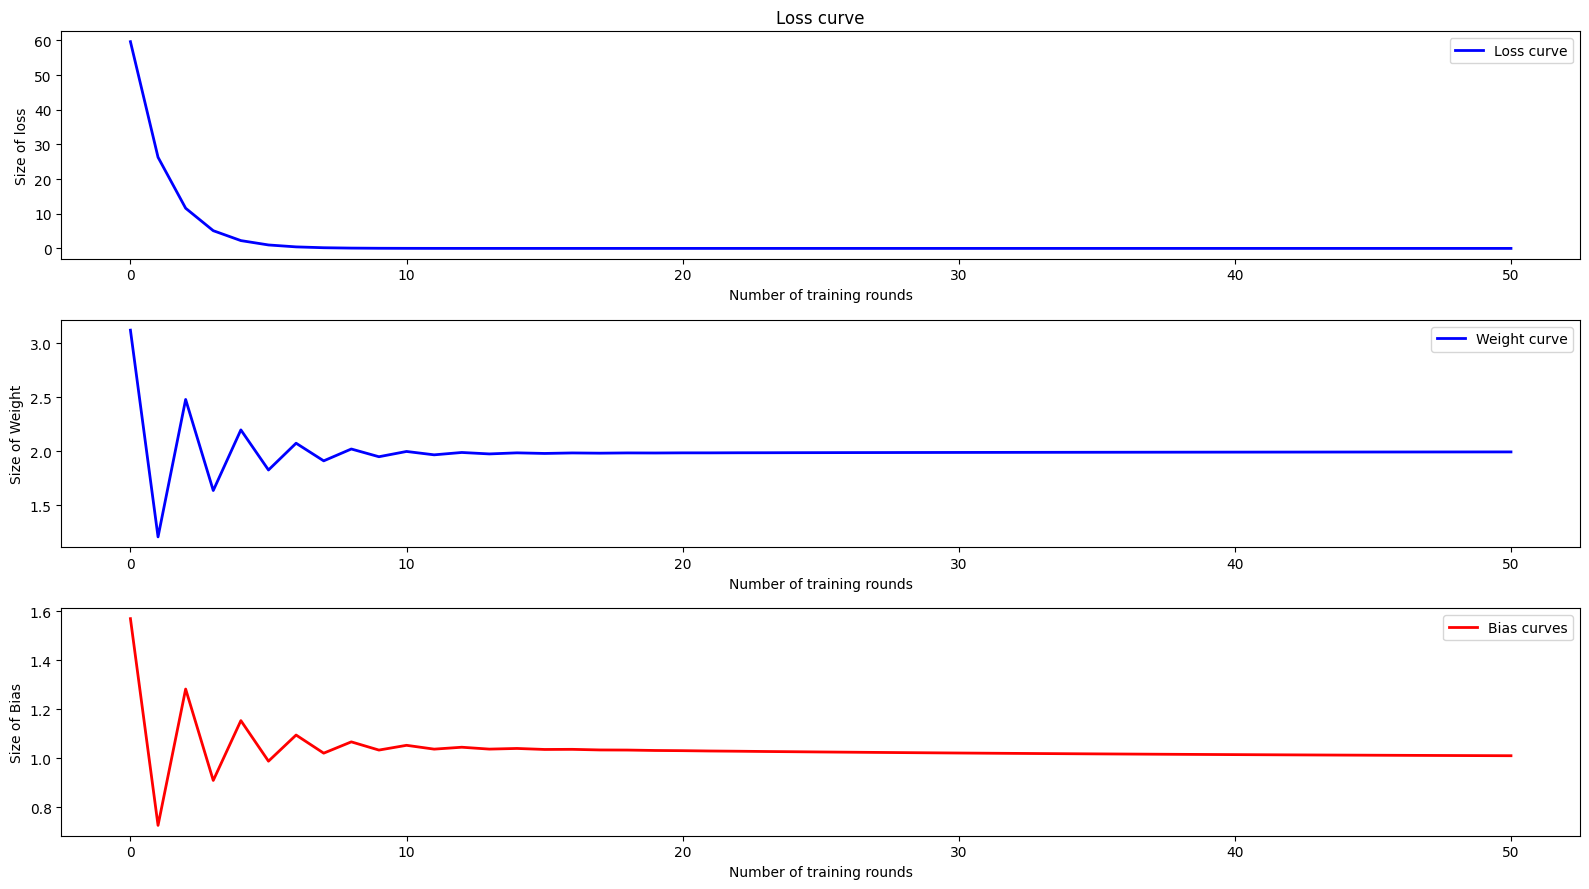

In [15]:
fig , axes = plt.subplots(3,1 , figsize =(16, 9))

axes[0].plot(epoch_list , loss_list , 'b-' , linewidth = 2 , label = 'Loss curve')
axes[0].set_xlabel('Number of training rounds')
axes[0].set_ylabel('Size of loss')
axes[0].set_title('Loss curve')
axes[0].legend()


axes[1].plot(epoch_list,w_list,'b-',linewidth=2 , label = 'Weight curve')
axes[1].set_xlabel('Number of training rounds')
axes[1].set_ylabel('Size of Weight')
axes[1].legend()

axes[2].plot(epoch_list,b_list,'r-',linewidth=2 , label = 'Bias curves')
axes[2].set_xlabel('Number of training rounds')
axes[2].set_ylabel('Size of Bias')
axes[2].legend()

plt.tight_layout()
plt.show()